In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from os import path as osp
import os
import Regression as reg
from sklearn.linear_model import LinearRegression

In [2]:
Variable_1 = '-health_diff_interact'
Variable_2 = '-health_diff'

path2csv = "D:\Work\Sampling_attetion\Azadeh_data\\data\\"
RegBetascsv = "D:\\Work\\Sampling_attetion\\Azadeh_data\\result" + "\\result_" + Variable_1 + Variable_2 + ".csv"
inst = ['nat','health','desire']
DV = "Choice" 

In [3]:
shortInst = inst
dirList = os.listdir(path2csv)
RegBetas ={'Subject':[],
         shortInst[0]+'-Taste':[],shortInst[0]+'-Health':[], shortInst[0]+ Variable_1:[], shortInst[0]+ Variable_2:[],\
         shortInst[1]+'-Taste':[],shortInst[1]+'-Health':[], shortInst[1]+ Variable_1:[], shortInst[1]+ Variable_2:[],\
         shortInst[2]+'-Taste':[],shortInst[2]+'-Health':[], shortInst[2]+ Variable_1:[], shortInst[2]+ Variable_2:[]}


for s in range(len(dirList)):

    print (path2csv + dirList[s])
    data = pd.read_excel(path2csv + dirList[s]) 
    RegBetas['Subject'].append(int(dirList[s][:len(dirList[0])-4]))
    data = data.dropna()
    for ins in shortInst:
        cond = data.instruction == inst[shortInst.index(ins)]
        X       = np.zeros((len(data.trial[cond]) - 1,4))
        data
        X[:,0]  = data.taste[cond][1:]
        X[:,1]  = data.health[cond][1:]
        X[:,2]  = (data.health[cond][1:].reset_index(drop=True) - data.health[cond][1:].mean()) * (data['health'][cond][0:-1].reset_index(drop=True) - data['health'][cond][0:-1].mean())
        X[:,3]  = data['taste'][cond][0:-1]

        if DV == 'Choice':
            Y       = data.choice[data.instruction == inst[shortInst.index(ins)]][1:]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y))[t] for t in range(len(Y))]

            if any(whichTr):
                Y = Y[whichTr]
                X = X[whichTr,:]

                reg      = LinearRegression().fit(X,Y)
                RegBetas[ins +'-Taste'].append(reg.coef_[0])
                RegBetas[ins +'-Health'].append(reg.coef_[1])
                RegBetas[ins + Variable_1].append(reg.coef_[2])
                RegBetas[ins + Variable_2].append(reg.coef_[3])

        elif DV == 'Liking':
            Y1       = data.preLiking[data.instruction == inst[shortInst.index(ins)]]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y1))[t] for t in range(len(Y1))]

            if any(whichTr):
                Y1 = Y1[whichTr]
                X1  = X[whichTr,:]
                reg      = LinearRegression().fit(X1,Y1)
                RegBetas[ins +'-Taste-pre'].append(reg.coef_[0])
                RegBetas[ins +'-Health-pre'].append(reg.coef_[1])
                RegBetas[ins + Variable_1].append(reg.coef_[2])
                RegBetas[ins + Variable_2].append(reg.coef_[3])

            Y2       = data.Liking[data.instruction == inst[shortInst.index(ins)]]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y2))[t] for t in range(len(Y2))]

            if any(whichTr):
                Y2 = Y2[whichTr]
                X2  = X[whichTr,:]
                reg      = LinearRegression().fit(X2,Y2)
                RegBetas[ins +'-Taste-post'].append(reg.coef_[0])
                RegBetas[ins +'-Health-post'].append(reg.coef_[1])
                RegBetas[ins + Variable_1].append(reg.coef_[2])
                RegBetas[ins + Variable_2].append(reg.coef_[3])

        elif DV == 'RT':
            Y       = data.RT[data.instruction == inst[shortInst.index(ins)]]
            whichTr = [list(~np.isnan(X[:,0]))[t]  and list(~np.isnan(X[:,1]))[t] and\
            list(~np.isnan(Y))[t] for t in range(len(Y))]

            if any(whichTr):
                Y = Y[whichTr]
                X = X[whichTr,:]

                reg      = LinearRegression().fit(X,Y)
                RegBetas[ins+'-Taste'].append(reg.coef_[0])
                RegBetas[ins+'-Health'].append(reg.coef_[1])
                RegBetas[ins+ Variable_1].append(reg.coef_[2])
                RegBetas[ins + Variable_2].append(reg.coef_[3])

D:\Work\Sampling_attetion\Azadeh_data\data\104.xls
D:\Work\Sampling_attetion\Azadeh_data\data\105.xls
D:\Work\Sampling_attetion\Azadeh_data\data\106.xls
D:\Work\Sampling_attetion\Azadeh_data\data\107.xls
D:\Work\Sampling_attetion\Azadeh_data\data\111.xls
D:\Work\Sampling_attetion\Azadeh_data\data\112.xls
D:\Work\Sampling_attetion\Azadeh_data\data\113.xls
D:\Work\Sampling_attetion\Azadeh_data\data\114.xls
D:\Work\Sampling_attetion\Azadeh_data\data\115.xls
D:\Work\Sampling_attetion\Azadeh_data\data\116.xls
D:\Work\Sampling_attetion\Azadeh_data\data\117.xls
D:\Work\Sampling_attetion\Azadeh_data\data\118.xls


KeyboardInterrupt: 

In [60]:
temp = pd.DataFrame.from_dict(RegBetas)
temp.to_csv(RegBetascsv)

In [61]:
study='Is there any effect of previous choice?'
# plot taste and health weights on choice=
choiceBetas = pd.read_csv("D:\\Work\\Sampling_attetion\\Azadeh_data\\result" + "\\result_" + Variable_1 + Variable_2 + ".csv")
#get rid of the Unnamed column
choiceBetas = choiceBetas.drop(choiceBetas.columns[0],axis=1)
#get rid of - in column labels to be possible to call
cols = list(choiceBetas.columns)
for c in range(len(cols)):
    cols[c] = cols[c].replace('-','')
choiceBetas.columns = cols

#[cols[c] = cols[c].replace('-','') for c in range(len(cols))]
condsOld = ['nat','health','desire']
condsNew = ['NATURAL','HEALTH','DESIRE']
attsOld  = ['Taste','Health', Variable_1[1:], Variable_2[1:]]
attsNew  = ['Tastiness','Healthiness', 'Tastiness diff inter', 'Healthiness diff']
colors   = ['royalblue','salmon','gold']

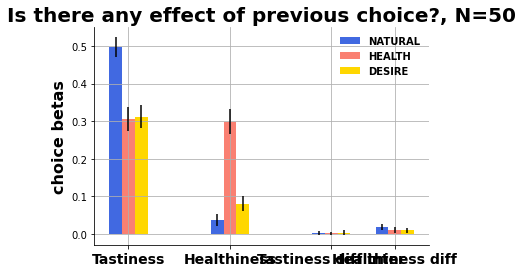

In [62]:
fig, ax = plt.subplots()
width = 1
x = np.asarray([0, 8, 16, 21])
dist = [-1, 0, 1]
for c in range(len(condsNew)):
    y = list()
    ysd = list()
    [y.append(np.mean(choiceBetas[condsOld[c]+attsOld[a]])) for a in range(len(attsOld))]
    [ysd.append(np.std(choiceBetas[condsOld[c]+attsOld[a]])/np.sqrt(choiceBetas.shape[0])) for a in range(len(attsOld))]
    ax.bar(x+np.asarray(dist[c])*width,y,width,label =condsNew[c],color=colors[c])
    ax.errorbar(x+np.asarray(dist[c])*width,y,yerr=ysd,ecolor='k',fmt='none')

ax.set_ylabel('choice betas',fontdict={'fontsize':16,'fontweight': 'bold'})
ax.set_title(study+ ', N='+str(choiceBetas.shape[0]),fontdict={'fontsize':20,'fontweight': 'bold'})
ax.set_xticks(x)
ax.set_xticklabels(attsNew,fontdict={'fontsize':14,'fontweight': 'bold'})
#remove top frame border
ax.spines['top'].set_visible(False)
#remove right frame border
ax.spines['right'].set_visible(False)
plt.legend(fontsize = 12, prop = {'weight':'bold'},frameon=False)
ax.grid(b=None)
plt.show()